In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
optimized_result = pd.read_csv("../Data/Accuracy_all_drugs.csv")

In [4]:
Drug = "Venetoclax"
result_df_cur_threshod = optimized_result[optimized_result['Drug'] == Drug]
result_df_cur_threshod.head(3)

,Unnamed: 0,Drug,Threshold,Feature,ACC_train,F1_train,ACC1_2,ACC_w3_4,F1_w1_2,F1_w3_4
10150,10150,Venetoclax,0.019093,Mut,0.684730,0.534884,0.40625,0.509295,0.00,0.090909
10151,10151,Venetoclax,0.019093,Mut,0.707272,0.574713,0.73750,0.497198,0.60,0.086957
10152,10152,Venetoclax,0.019093,Mut,0.669827,0.506667,0.53750,0.509295,0.25,0.090909


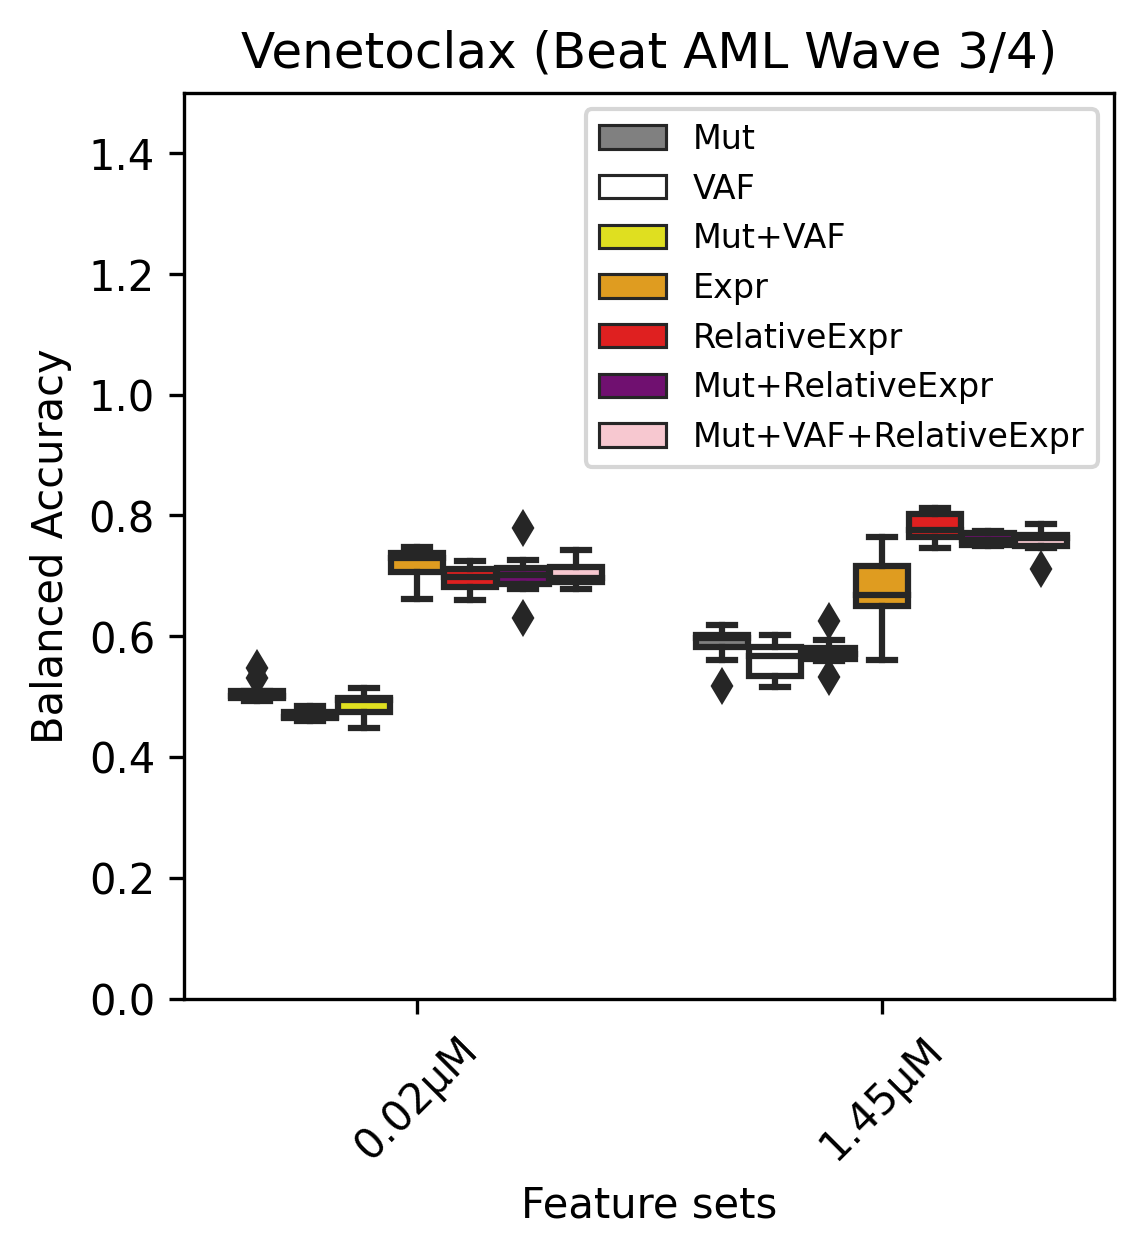

In [6]:

plt.figure(figsize = (4,4),dpi = 300)
sns.boxplot(x="Threshold", y="ACC_w3_4",
                hue="Feature", palette=["grey","white","yellow","orange" ,"red","purple","pink"],
                data=result_df_cur_threshod)
xticks_locs, xticks_labels = plt.xticks()
for i in range(0,len(xticks_labels)):
    xticks_labels[i] = str(round(float(xticks_labels[i].get_text()),2)) + "μM"

plt.xticks(xticks_locs, xticks_labels, rotation = 45)
plt.ylim(0,1.5)
plt.legend(fontsize = 8)
plt.title(Drug.split("(")[0]+" (Beat AML Wave 3/4)" )
    #threshold_list_label = ["set1","set3","set4","set1&4"]

plt.ylabel("Balanced Accuracy")
plt.xlabel("Feature sets")
plt.show()

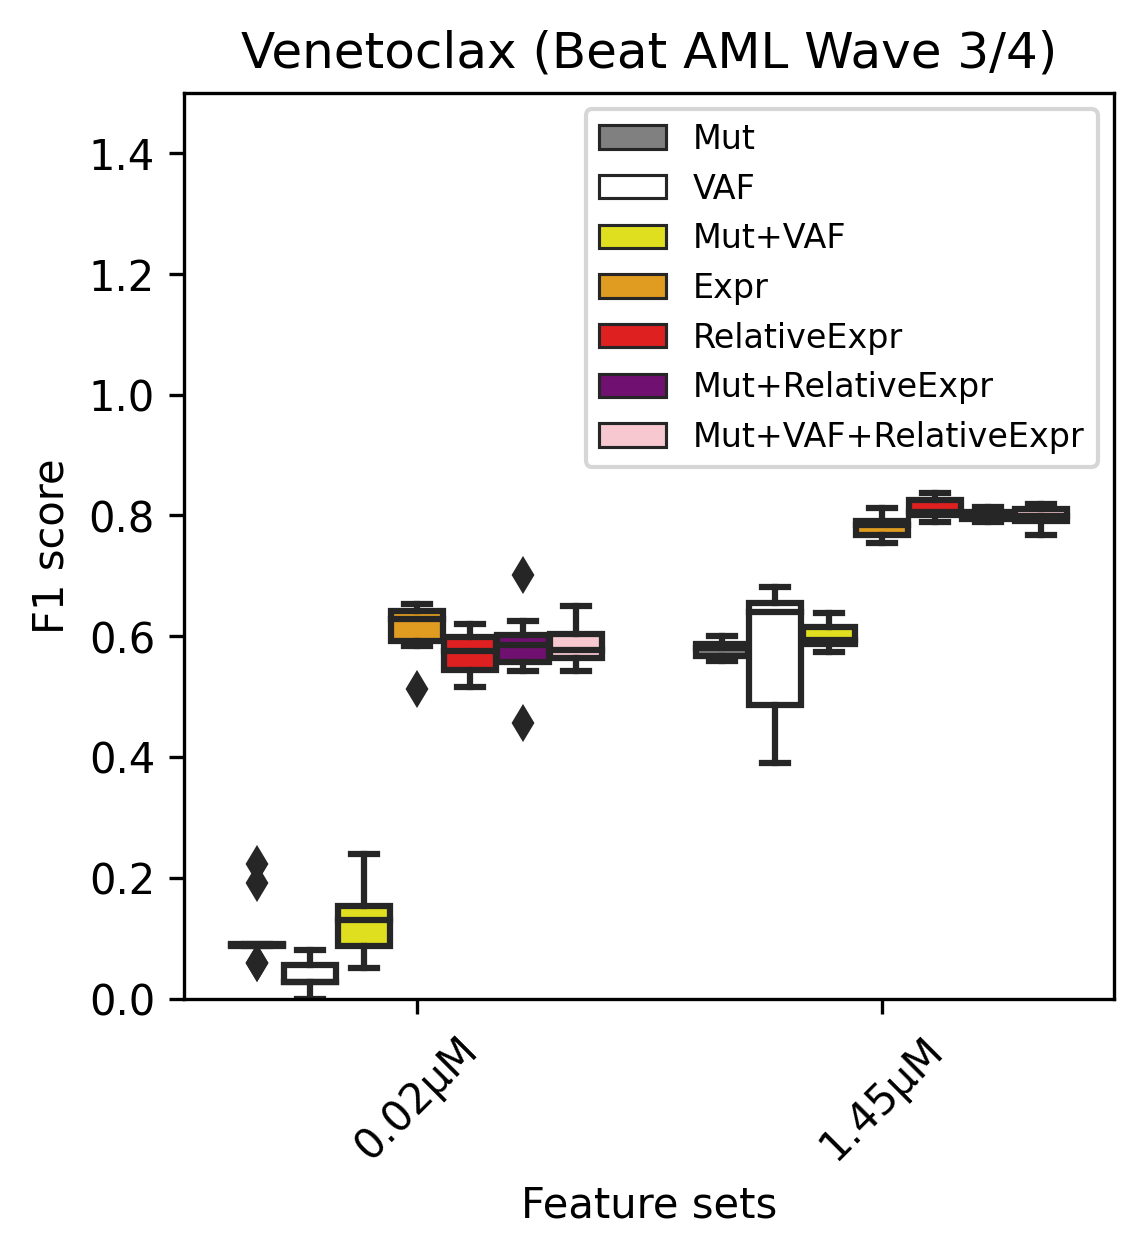

In [7]:
plt.figure(figsize = (4,4),dpi = 300)
sns.boxplot(x="Threshold", y="F1_w3_4",
                hue="Feature", palette=["grey","white","yellow","orange" ,"red","purple","pink"],
                data=result_df_cur_threshod)
xticks_locs, xticks_labels = plt.xticks()
for i in range(0,len(xticks_labels)):
    xticks_labels[i] = str(round(float(xticks_labels[i].get_text()),2)) + "μM"

plt.xticks(xticks_locs, xticks_labels, rotation = 45)
plt.ylim(0,1.5)
plt.legend(fontsize = 8)
plt.title(Drug.split("(")[0]+" (Beat AML Wave 3/4)" )
    #threshold_list_label = ["set1","set3","set4","set1&4"]

plt.ylabel("F1 score")
plt.xlabel("Feature sets")
plt.show()

In [34]:
set(result_df_cur_threshod['Threshold'])

{0.0190925713799281, 1.45261900330956}

Mut Mut
Mut VAF
Mut Mut+VAF
Mut Expr
Mut RelativeExpr
Mut Mut+RelativeExpr
Mut Mut+VAF+RelativeExpr
VAF Mut
VAF VAF
VAF Mut+VAF
VAF Expr
VAF RelativeExpr
VAF Mut+RelativeExpr
VAF Mut+VAF+RelativeExpr
Mut+VAF Mut
Mut+VAF VAF
Mut+VAF Mut+VAF
Mut+VAF Expr
Mut+VAF RelativeExpr
Mut+VAF Mut+RelativeExpr
Mut+VAF Mut+VAF+RelativeExpr
Expr Mut
Expr VAF
Expr Mut+VAF
Expr Expr
Expr RelativeExpr
Expr Mut+RelativeExpr
Expr Mut+VAF+RelativeExpr
RelativeExpr Mut
RelativeExpr VAF
RelativeExpr Mut+VAF
RelativeExpr Expr
RelativeExpr RelativeExpr
RelativeExpr Mut+RelativeExpr
RelativeExpr Mut+VAF+RelativeExpr
Mut+RelativeExpr Mut
Mut+RelativeExpr VAF
Mut+RelativeExpr Mut+VAF
Mut+RelativeExpr Expr
Mut+RelativeExpr RelativeExpr
Mut+RelativeExpr Mut+RelativeExpr
Mut+RelativeExpr Mut+VAF+RelativeExpr
Mut+VAF+RelativeExpr Mut
Mut+VAF+RelativeExpr VAF
Mut+VAF+RelativeExpr Mut+VAF
Mut+VAF+RelativeExpr Expr
Mut+VAF+RelativeExpr RelativeExpr
Mut+VAF+RelativeExpr Mut+RelativeExpr
Mut+VAF+RelativeExpr Mut+VAF+Relat

([<matplotlib.axis.YTick at 0x149e30520>,
 [Text(0, 0.5, 'Mut'),
  Text(0, 1.5, 'VAF'),
  Text(0, 2.5, 'Mut+VAF'),
  Text(0, 3.5, 'Expr'),
  Text(0, 4.5, 'RelativeExpr'),
  Text(0, 5.5, 'Mut+RelativeExpr'),
  Text(0, 6.5, 'Mut+VAF+RelativeExpr')])

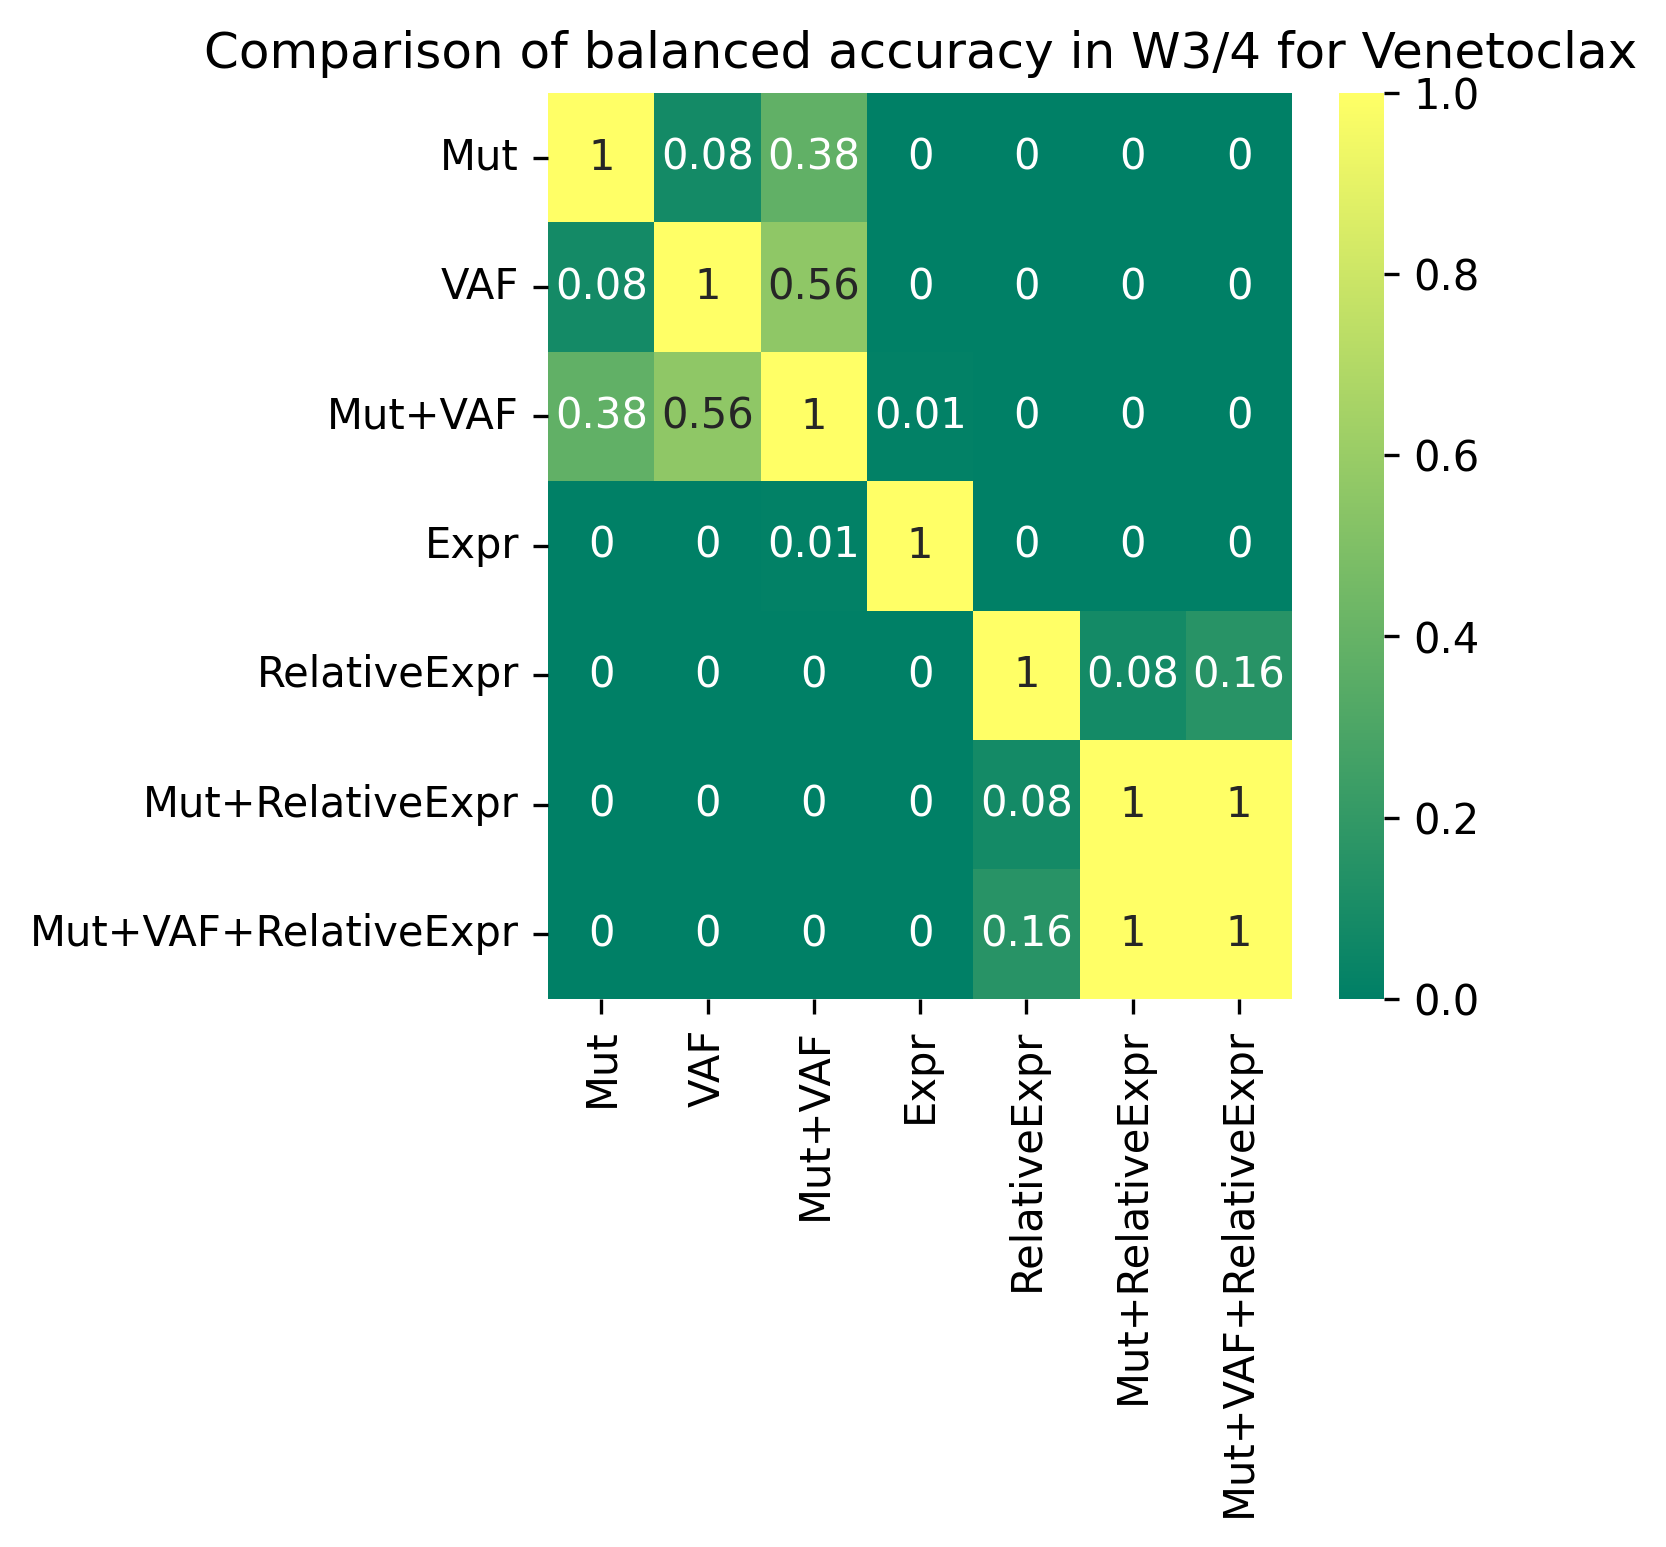

In [35]:
r_data = result_df_cur_threshod.loc[result_df_cur_threshod['Threshold'] == 1.45261900330956	]
# ranksum test
from scipy.stats import ranksums, wilcoxon
featureset = [ 'Mut', 'VAF','Mut+VAF', 'Expr', 'RelativeExpr', 'Mut+RelativeExpr','Mut+VAF+RelativeExpr']

result_p = pd.DataFrame()
row_list = []
for feature1 in featureset:
    p_list_cur = []
    for feature2 in featureset:
        print(feature1, feature2)
        if feature1 != feature2:
            d = r_data.loc[r_data['Feature'] == feature1]['ACC_w3_4'].values  - r_data.loc[r_data['Feature'] == feature2]['ACC_w3_4'].values
            p = wilcoxon(d)[1]
        else:
            p = 1
        #p = ranksums(r_data.loc[r_data['Feature_set'] == feature1]['Balanced_ACC'].values, 
        #             r_data.loc[r_data['Feature_set'] == feature2]['Balanced_ACC'].values)[1]
        p_list_cur.append(round(p,2))

    result_p[feature1] = p_list_cur


# heatmap plot for p value
plt.figure(figsize = (4,4),dpi = 300)
sns.heatmap(result_p, annot=True, cmap="summer")
plt.title( "Comparison of balanced accuracy in W3/4 for " + Drug.split('(')[0] )
#plt.xticks([0.5,1.5,2.5,3.5,4,5,5.5], featureset, rotation = 90)
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], featureset, rotation = 0)

Mut Mut
Mut VAF
Mut Mut+VAF
Mut Expr
Mut RelativeExpr
Mut Mut+RelativeExpr
Mut Mut+VAF+RelativeExpr
VAF Mut
VAF VAF
VAF Mut+VAF
VAF Expr
VAF RelativeExpr
VAF Mut+RelativeExpr
VAF Mut+VAF+RelativeExpr
Mut+VAF Mut
Mut+VAF VAF
Mut+VAF Mut+VAF
Mut+VAF Expr
Mut+VAF RelativeExpr
Mut+VAF Mut+RelativeExpr
Mut+VAF Mut+VAF+RelativeExpr
Expr Mut
Expr VAF
Expr Mut+VAF
Expr Expr
Expr RelativeExpr
Expr Mut+RelativeExpr
Expr Mut+VAF+RelativeExpr
RelativeExpr Mut
RelativeExpr VAF
RelativeExpr Mut+VAF
RelativeExpr Expr
RelativeExpr RelativeExpr
RelativeExpr Mut+RelativeExpr
RelativeExpr Mut+VAF+RelativeExpr
Mut+RelativeExpr Mut
Mut+RelativeExpr VAF
Mut+RelativeExpr Mut+VAF
Mut+RelativeExpr Expr
Mut+RelativeExpr RelativeExpr
Mut+RelativeExpr Mut+RelativeExpr
Mut+RelativeExpr Mut+VAF+RelativeExpr
Mut+VAF+RelativeExpr Mut
Mut+VAF+RelativeExpr VAF
Mut+VAF+RelativeExpr Mut+VAF
Mut+VAF+RelativeExpr Expr
Mut+VAF+RelativeExpr RelativeExpr
Mut+VAF+RelativeExpr Mut+RelativeExpr
Mut+VAF+RelativeExpr Mut+VAF+Relat

([<matplotlib.axis.YTick at 0x149e9f8b0>,
 [Text(0, 0.5, 'Mut'),
  Text(0, 1.5, 'VAF'),
  Text(0, 2.5, 'Mut+VAF'),
  Text(0, 3.5, 'Expr'),
  Text(0, 4.5, 'RelativeExpr'),
  Text(0, 5.5, 'Mut+RelativeExpr'),
  Text(0, 6.5, 'Mut+VAF+RelativeExpr')])

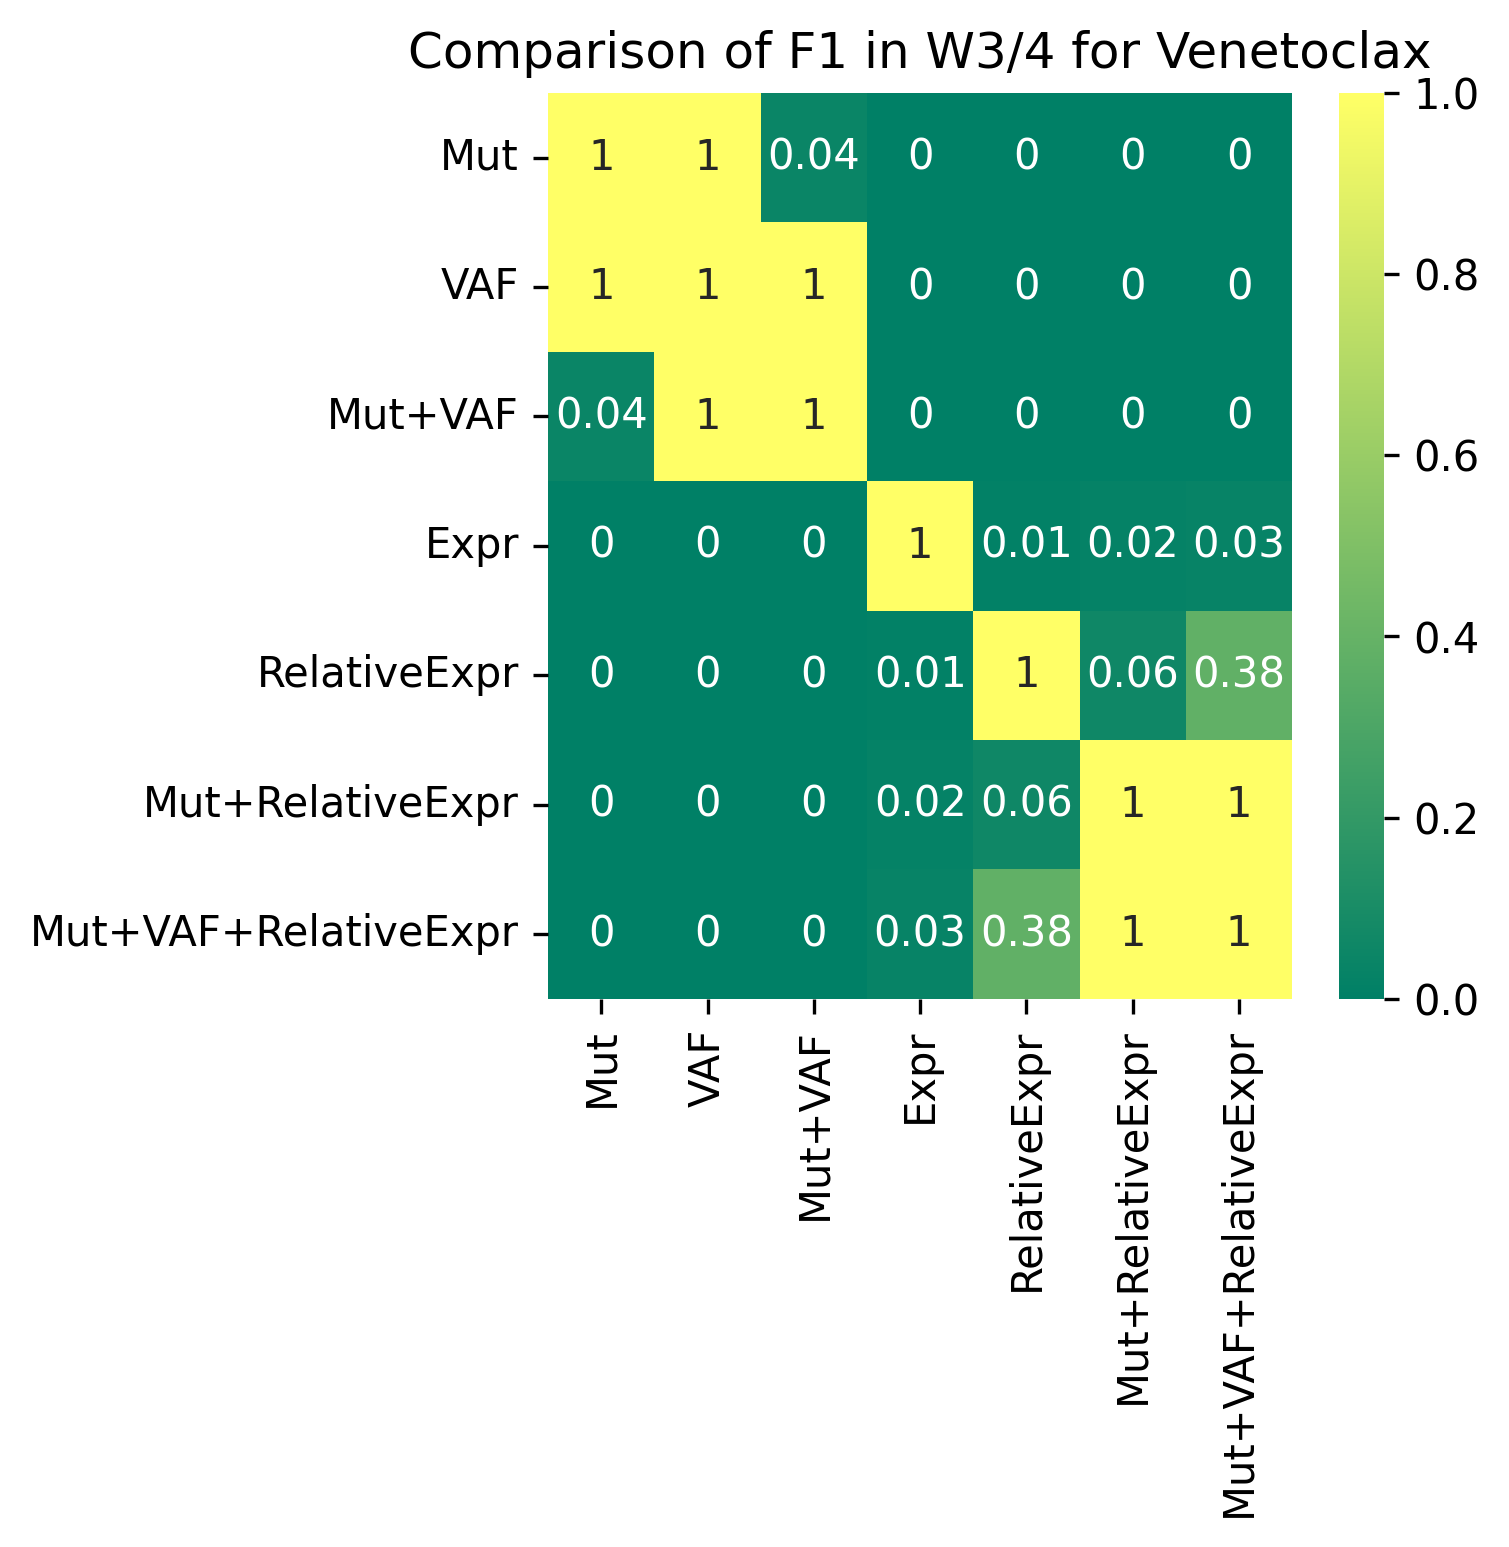

In [37]:
r_data = result_df_cur_threshod.loc[result_df_cur_threshod['Threshold'] == 1.45261900330956	]
# ranksum test
from scipy.stats import ranksums, wilcoxon
featureset = [ 'Mut', 'VAF','Mut+VAF', 'Expr', 'RelativeExpr', 'Mut+RelativeExpr','Mut+VAF+RelativeExpr']

result_p = pd.DataFrame()
row_list = []
for feature1 in featureset:
    p_list_cur = []
    for feature2 in featureset:
        print(feature1, feature2)
        if feature1 != feature2:
            d = r_data.loc[r_data['Feature'] == feature1]['F1_w3_4'].values  - r_data.loc[r_data['Feature'] == feature2]['F1_w3_4'].values
            p = wilcoxon(d)[1]
        else:
            p = 1
        #p = ranksums(r_data.loc[r_data['Feature_set'] == feature1]['Balanced_ACC'].values, 
        #             r_data.loc[r_data['Feature_set'] == feature2]['Balanced_ACC'].values)[1]
        p_list_cur.append(round(p,2))

    result_p[feature1] = p_list_cur


# heatmap plot for p value
plt.figure(figsize = (4,4),dpi = 300)
sns.heatmap(result_p, annot=True, cmap="summer")
plt.title( "Comparison of F1 in W3/4 for " + Drug.split('(')[0] )
#plt.xticks([0.5,1.5,2.5,3.5,4,5,5.5], featureset, rotation = 90)
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], featureset, rotation = 0)

In [8]:
Drug = "Trametinib (GSK1120212)"
result_df_cur_threshod = optimized_result[optimized_result['Drug'] == "Trametinib (GSK1120212)"]
result_df_cur_threshod.head(3)

,Unnamed: 0,Drug,Threshold,Feature,ACC_train,F1_train,ACC1_2,ACC_w3_4,F1_w1_2,F1_w3_4
6650,6650,Trametinib (GSK1120212),0.013717,Mut,0.734091,0.666667,0.547619,0.620880,0.461538,0.540881
6651,6651,Trametinib (GSK1120212),0.013717,Mut,0.737851,0.669725,0.476190,0.611911,0.333333,0.545455
6652,6652,Trametinib (GSK1120212),0.013717,Mut,0.727273,0.657534,0.583333,0.659366,0.518519,0.616279


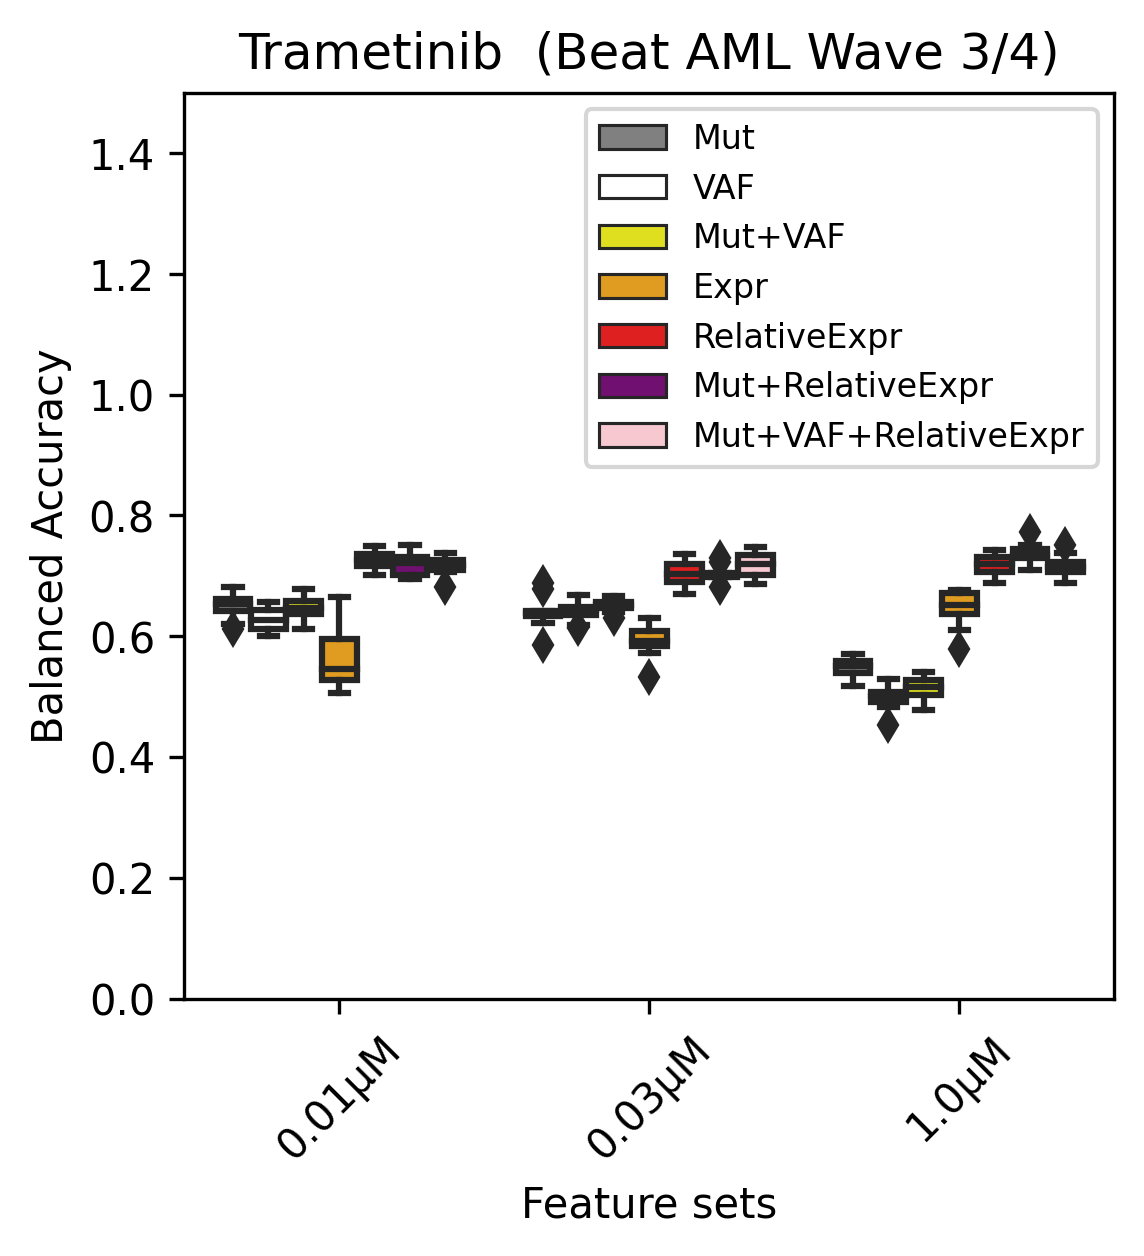

In [9]:
#result_df_cur_threshod = result_df.loc[result_df['Dataset'] =="W3/4(Test)" ]

    #boxplot of result_df_cur_threshold grouped by feature_set
plt.figure(figsize = (4,4),dpi = 300)
sns.boxplot(x="Threshold", y="ACC_w3_4",
                hue="Feature", palette=["grey","white","yellow","orange" ,"red","purple","pink"],
                data=result_df_cur_threshod)
xticks_locs, xticks_labels = plt.xticks()
for i in range(0,len(xticks_labels)):
    xticks_labels[i] = str(round(float(xticks_labels[i].get_text()),2)) + "μM"

plt.xticks(xticks_locs, xticks_labels, rotation = 45)
plt.ylim(0,1.5)
plt.legend(fontsize = 8)
plt.title(Drug.split("(")[0]+" (Beat AML Wave 3/4)" )
    #threshold_list_label = ["set1","set3","set4","set1&4"]

plt.ylabel("Balanced Accuracy")
plt.xlabel("Feature sets")
plt.show()

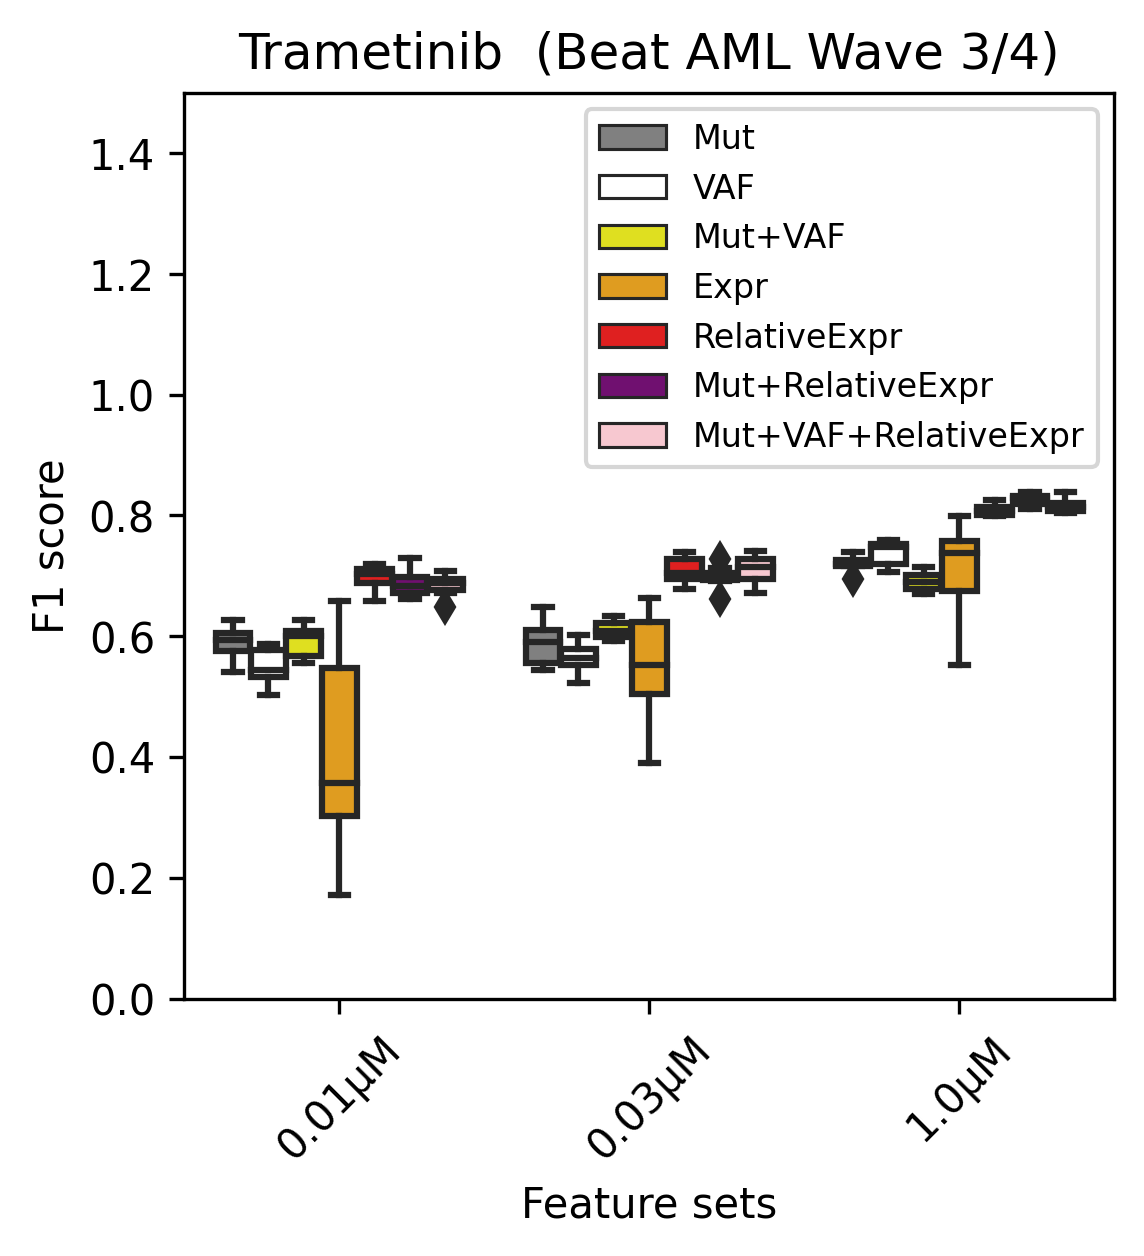

In [10]:
plt.figure(figsize = (4,4),dpi = 300)
sns.boxplot(x="Threshold", y="F1_w3_4",
                hue="Feature", palette=["grey","white","yellow","orange" ,"red","purple","pink"],
                data=result_df_cur_threshod)
xticks_locs, xticks_labels = plt.xticks()
for i in range(0,len(xticks_labels)):
    xticks_labels[i] = str(round(float(xticks_labels[i].get_text()),2)) + "μM"

plt.xticks(xticks_locs, xticks_labels, rotation = 45)
plt.ylim(0,1.5)
plt.legend(fontsize = 8)
plt.title(Drug.split("(")[0]+" (Beat AML Wave 3/4)" )
    #threshold_list_label = ["set1","set3","set4","set1&4"]

plt.ylabel("F1 score")
plt.xlabel("Feature sets")
plt.show()

Mut Mut
Mut VAF
Mut Mut+VAF
Mut Expr
Mut RelativeExpr
Mut Mut+RelativeExpr
Mut Mut+VAF+RelativeExpr
VAF Mut
VAF VAF
VAF Mut+VAF
VAF Expr
VAF RelativeExpr
VAF Mut+RelativeExpr
VAF Mut+VAF+RelativeExpr
Mut+VAF Mut
Mut+VAF VAF
Mut+VAF Mut+VAF
Mut+VAF Expr
Mut+VAF RelativeExpr
Mut+VAF Mut+RelativeExpr
Mut+VAF Mut+VAF+RelativeExpr
Expr Mut
Expr VAF
Expr Mut+VAF
Expr Expr
Expr RelativeExpr
Expr Mut+RelativeExpr
Expr Mut+VAF+RelativeExpr
RelativeExpr Mut
RelativeExpr VAF
RelativeExpr Mut+VAF
RelativeExpr Expr
RelativeExpr RelativeExpr
RelativeExpr Mut+RelativeExpr
RelativeExpr Mut+VAF+RelativeExpr
Mut+RelativeExpr Mut
Mut+RelativeExpr VAF
Mut+RelativeExpr Mut+VAF
Mut+RelativeExpr Expr
Mut+RelativeExpr RelativeExpr
Mut+RelativeExpr Mut+RelativeExpr
Mut+RelativeExpr Mut+VAF+RelativeExpr
Mut+VAF+RelativeExpr Mut
Mut+VAF+RelativeExpr VAF
Mut+VAF+RelativeExpr Mut+VAF
Mut+VAF+RelativeExpr Expr
Mut+VAF+RelativeExpr RelativeExpr
Mut+VAF+RelativeExpr Mut+RelativeExpr
Mut+VAF+RelativeExpr Mut+VAF+Relat

([<matplotlib.axis.YTick at 0x149539450>,
 [Text(0, 0.5, 'Mut'),
  Text(0, 1.5, 'VAF'),
  Text(0, 2.5, 'Mut+VAF'),
  Text(0, 3.5, 'Expr'),
  Text(0, 4.5, 'RelativeExpr'),
  Text(0, 5.5, 'Mut+RelativeExpr'),
  Text(0, 6.5, 'Mut+VAF+RelativeExpr')])

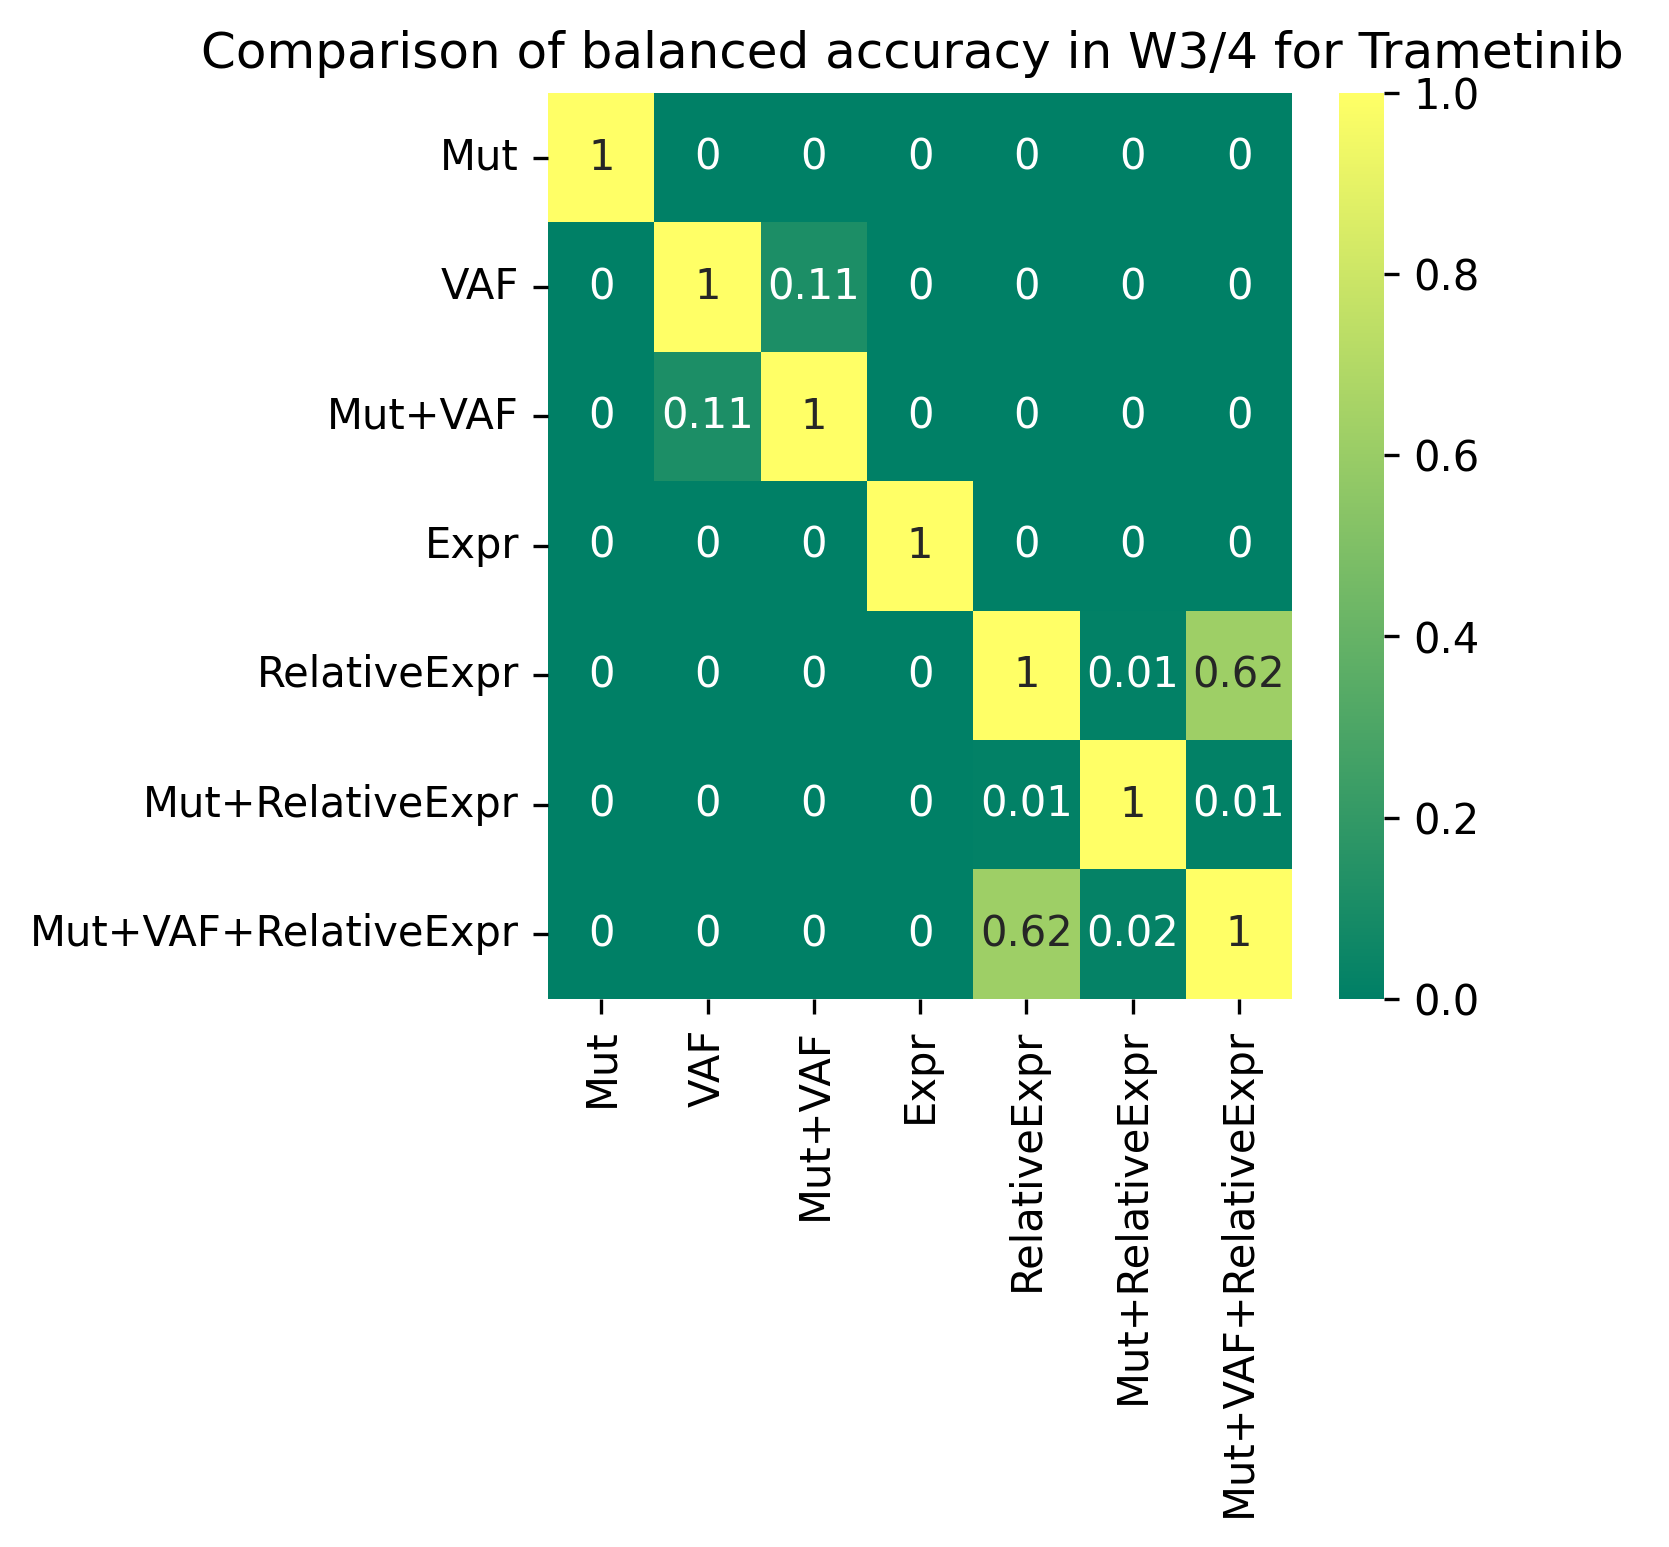

In [28]:
r_data = result_df_cur_threshod.loc[result_df_cur_threshod['Threshold'] == 1	]
# ranksum test
from scipy.stats import ranksums, wilcoxon
featureset = [ 'Mut', 'VAF','Mut+VAF', 'Expr', 'RelativeExpr', 'Mut+RelativeExpr','Mut+VAF+RelativeExpr']

result_p = pd.DataFrame()
row_list = []
for feature1 in featureset:
    p_list_cur = []
    for feature2 in featureset:
        print(feature1, feature2)
        if feature1 != feature2:
            d = r_data.loc[r_data['Feature'] == feature1]['ACC_w3_4'].values  - r_data.loc[r_data['Feature'] == feature2]['ACC_w3_4'].values
            p = wilcoxon(d)[1]
        else:
            p = 1
        #p = ranksums(r_data.loc[r_data['Feature_set'] == feature1]['Balanced_ACC'].values, 
        #             r_data.loc[r_data['Feature_set'] == feature2]['Balanced_ACC'].values)[1]
        p_list_cur.append(round(p,2))

    result_p[feature1] = p_list_cur


# heatmap plot for p value
plt.figure(figsize = (4,4),dpi = 300)
sns.heatmap(result_p, annot=True, cmap="summer")
plt.title( "Comparison of balanced accuracy in W3/4 for " + Drug.split('(')[0] )
#plt.xticks([0.5,1.5,2.5,3.5,4,5,5.5], featureset, rotation = 90)
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], featureset, rotation = 0)
# set fontsize for the legend

Mut Mut
Mut VAF
Mut Mut+VAF
Mut Expr
Mut RelativeExpr
Mut Mut+RelativeExpr
Mut Mut+VAF+RelativeExpr
VAF Mut
VAF VAF
VAF Mut+VAF
VAF Expr
VAF RelativeExpr
VAF Mut+RelativeExpr
VAF Mut+VAF+RelativeExpr
Mut+VAF Mut
Mut+VAF VAF
Mut+VAF Mut+VAF
Mut+VAF Expr
Mut+VAF RelativeExpr
Mut+VAF Mut+RelativeExpr
Mut+VAF Mut+VAF+RelativeExpr
Expr Mut
Expr VAF
Expr Mut+VAF
Expr Expr
Expr RelativeExpr
Expr Mut+RelativeExpr
Expr Mut+VAF+RelativeExpr
RelativeExpr Mut
RelativeExpr VAF
RelativeExpr Mut+VAF
RelativeExpr Expr
RelativeExpr RelativeExpr
RelativeExpr Mut+RelativeExpr
RelativeExpr Mut+VAF+RelativeExpr
Mut+RelativeExpr Mut
Mut+RelativeExpr VAF
Mut+RelativeExpr Mut+VAF
Mut+RelativeExpr Expr
Mut+RelativeExpr RelativeExpr
Mut+RelativeExpr Mut+RelativeExpr
Mut+RelativeExpr Mut+VAF+RelativeExpr
Mut+VAF+RelativeExpr Mut
Mut+VAF+RelativeExpr VAF
Mut+VAF+RelativeExpr Mut+VAF
Mut+VAF+RelativeExpr Expr
Mut+VAF+RelativeExpr RelativeExpr
Mut+VAF+RelativeExpr Mut+RelativeExpr
Mut+VAF+RelativeExpr Mut+VAF+Relat

([<matplotlib.axis.YTick at 0x1497a7c10>,
 [Text(0, 0.5, 'Mut'),
  Text(0, 1.5, 'VAF'),
  Text(0, 2.5, 'Mut+VAF'),
  Text(0, 3.5, 'Expr'),
  Text(0, 4.5, 'RelativeExpr'),
  Text(0, 5.5, 'Mut+RelativeExpr'),
  Text(0, 6.5, 'Mut+VAF+RelativeExpr')])

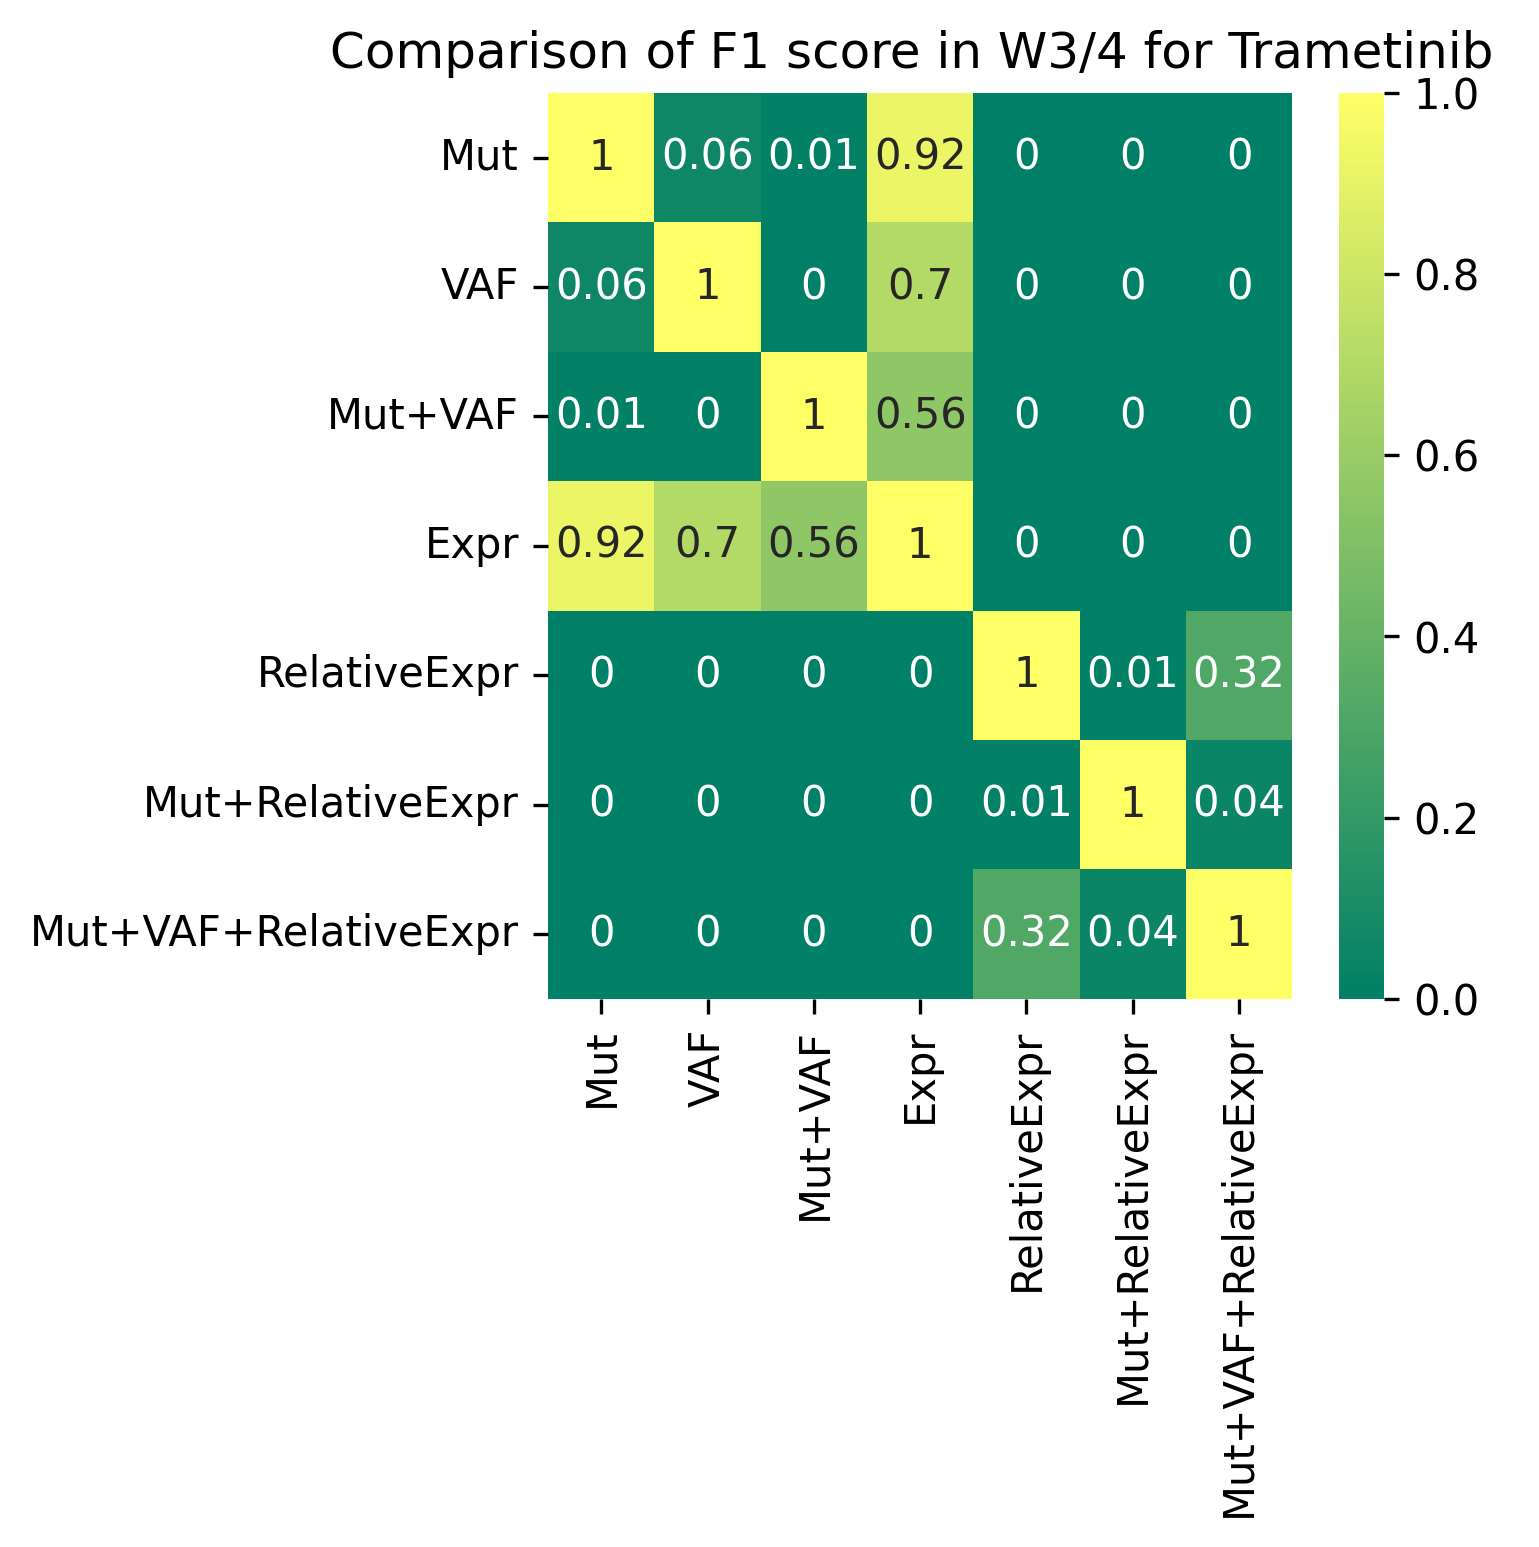

In [29]:
r_data = result_df_cur_threshod.loc[result_df_cur_threshod['Threshold'] == 1	]
# ranksum test
from scipy.stats import ranksums, wilcoxon
featureset = [ 'Mut', 'VAF','Mut+VAF', 'Expr', 'RelativeExpr', 'Mut+RelativeExpr','Mut+VAF+RelativeExpr']

result_p = pd.DataFrame()
row_list = []
for feature1 in featureset:
    p_list_cur = []
    for feature2 in featureset:
        print(feature1, feature2)
        if feature1 != feature2:
            d = r_data.loc[r_data['Feature'] == feature1]['F1_w3_4'].values  - r_data.loc[r_data['Feature'] == feature2]['F1_w3_4'].values
            p = wilcoxon(d)[1]
        else:
            p = 1
        #p = ranksums(r_data.loc[r_data['Feature_set'] == feature1]['Balanced_ACC'].values, 
        #             r_data.loc[r_data['Feature_set'] == feature2]['Balanced_ACC'].values)[1]
        p_list_cur.append(round(p,2))

    result_p[feature1] = p_list_cur


# heatmap plot for p value
plt.figure(figsize = (4,4),dpi = 300)
sns.heatmap(result_p, annot=True, cmap="summer")
plt.title( "Comparison of F1 score in W3/4 for " + Drug.split('(')[0] )
#plt.xticks([0.5,1.5,2.5,3.5,4,5,5.5], featureset, rotation = 90)
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5], featureset, rotation = 0)
# set fontsize for the legend